In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

path = r"C:\Users\adria\Desktop\Python\Statistiska_Metoder\Exercises\Advertising.csv"

adv = pd.read_csv(path, delimiter=",")

adv.drop("Unnamed: 0", axis= 1, inplace=True)

adv.head()
adv.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


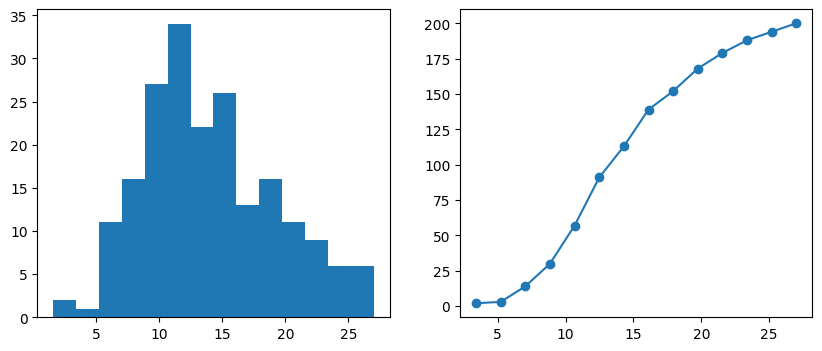

In [43]:
sales = adv["Sales"]
bins = np.linspace(sales.min(), sales.max(), 15)
frequencies, edges = np.histogram(sales, bins= bins)
cum_freq = np.cumsum(frequencies)

x_values = edges[1:]
y_values = cum_freq

fig, ax = plt.subplots(1, 2, figsize=(10,4), dpi=100)

ax[0].hist(sales, bins= bins)
ax[1].plot(x_values, y_values, marker="o")

In [44]:
params_lognorm = st.lognorm.fit(sales)
ks_lognorm = st.kstest(sales, "lognorm", params_lognorm)

params_gamma = st.gamma.fit(sales)
ks_gamma = st.kstest(sales, "gamma", params_gamma)

params_weibull = st.weibull_min.fit(sales)
ks_weibull = st.kstest(sales, "weibull_min", params_weibull)

params_norm = st.norm.fit(sales)
ks_norm = st.kstest(sales, "norm", params_norm)

print(ks_lognorm)
print(ks_gamma)
print(ks_weibull)
print(ks_norm)

KstestResult(statistic=np.float64(0.06122296340146638), pvalue=np.float64(0.4247095005395194), statistic_location=np.float64(12.9), statistic_sign=np.int8(1))
KstestResult(statistic=np.float64(0.06172869448034973), pvalue=np.float64(0.41442838403038695), statistic_location=np.float64(12.9), statistic_sign=np.int8(1))
KstestResult(statistic=np.float64(0.06982985528077545), pvalue=np.float64(0.2708126258085679), statistic_location=np.float64(12.9), statistic_sign=np.int8(1))
KstestResult(statistic=np.float64(0.09538258324761706), pvalue=np.float64(0.04914112083630506), statistic_location=np.float64(12.9), statistic_sign=np.int8(1))


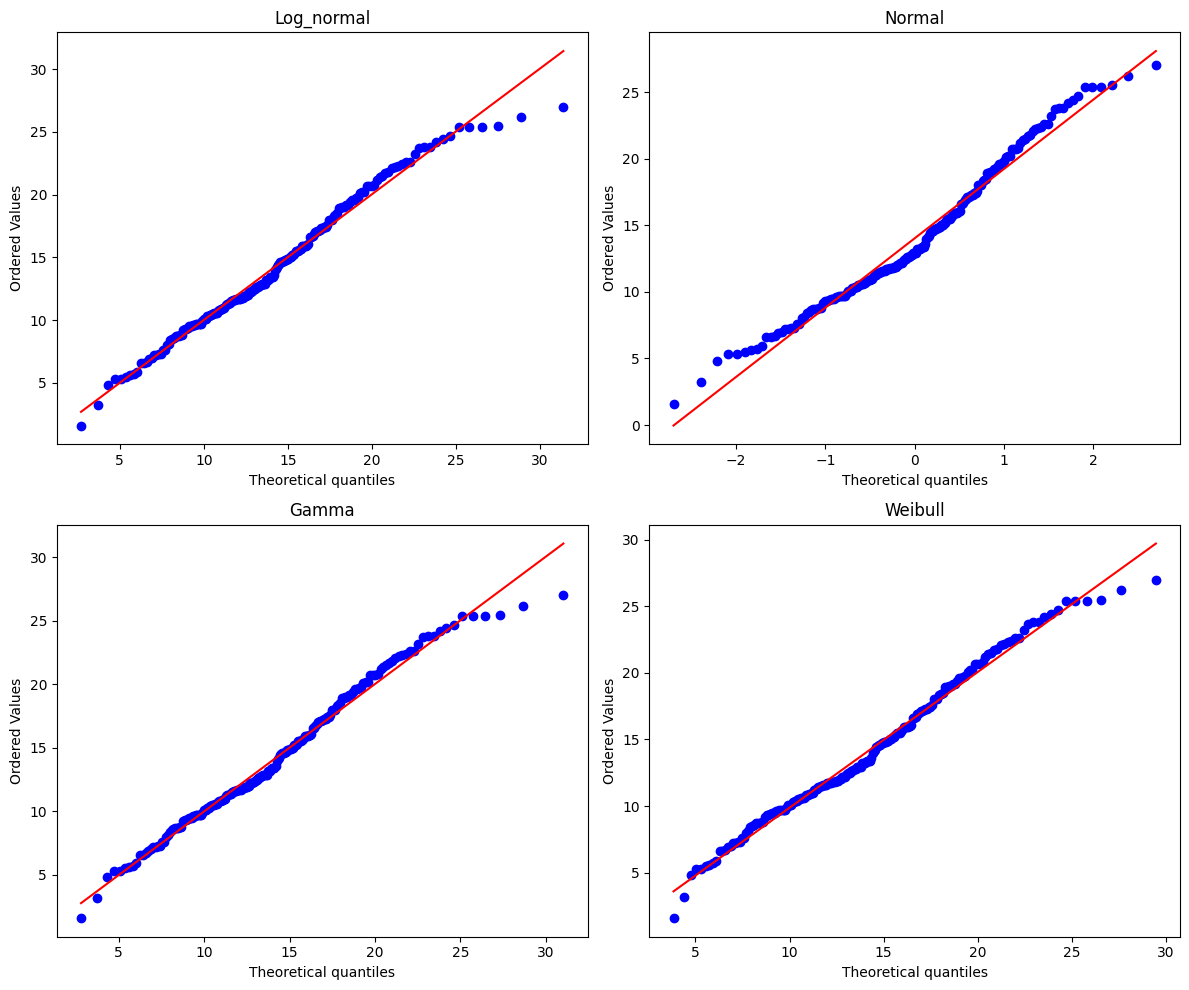

In [53]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
shape_l, loc_l, scale_l = st.lognorm.fit(sales)
shape_g, loc_g, scale_g = st.gamma.fit(sales)
shape_w, loc_w, scale_w = st.weibull_min.fit(sales)

class lognormdist:
    def ppf(self, q):
        return st.lognorm.ppf(q, shape_l, loc=loc_l, scale=scale_l)
    
class gammadist:
    def ppf(self, q):
        return st.gamma.ppf(q, shape_g, loc=loc_g, scale=scale_g)

class weibulldist:
    def ppf(self, q):
        return st.weibull_min.ppf(q, shape_w, loc=loc_w, scale=scale_w)
    
lognorm_dist = lognormdist()
gamma_dist = gammadist()
weibull_dist = weibulldist()

st.probplot(sales, dist= lognorm_dist, plot= ax[0, 0])
ax[0, 0].set_title("Log_normal")
st.probplot(sales, dist="norm", plot=ax[0, 1])
ax[0, 1].set_title("Normal")
st.probplot(sales, dist= gamma_dist, plot= ax[1, 0])
ax[1, 0].set_title("Gamma")
st.probplot(sales, dist= weibull_dist, plot= ax[1, 1])
ax[1, 1].set_title("Weibull")
fig.tight_layout()


In [54]:
def AIC(ll, k):
    return 2*k - 2*ll

def BIC(ll, k, n):
    return k*np.log(n) - 2*ll

n = len(sales)

ll_lognorm = np.sum(st.lognorm.logpdf(sales, *params_lognorm))
ll_gamma   = np.sum(st.gamma.logpdf(sales, *params_gamma))
ll_weibull = np.sum(st.weibull_min.logpdf(sales, *params_weibull))
ll_norm    = np.sum(st.norm.logpdf(sales, *params_norm))

print("AIC lognorm:", AIC(ll_lognorm, 3))
print("AIC gamma:",   AIC(ll_gamma,   3))
print("AIC weibull:", AIC(ll_weibull, 3))
print("AIC norm:",    AIC(ll_norm,    2))


AIC lognorm: 1225.4882618655918
AIC gamma: 1225.1957687250872
AIC weibull: inf
AIC norm: 1231.3769189981633


Text(0.5, 0, 'Sales')

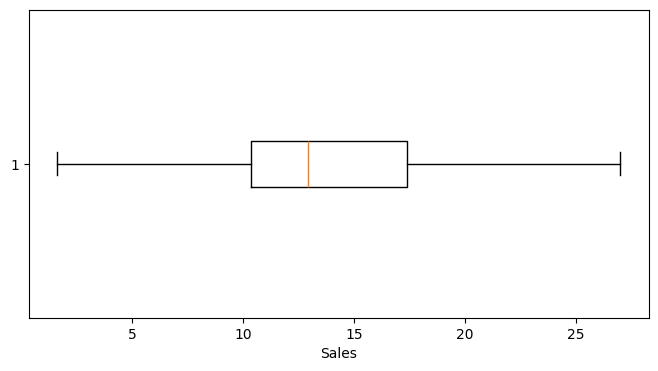

In [61]:
plt.figure(figsize=(8,4), dpi=100)

plt.boxplot(sales, vert=False, showfliers=True)
plt.xlabel("Sales")

In [74]:
display(adv.corr())
display(adv.cov())

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


,TV,Radio,Newspaper,Sales
TV,7370.949893,69.862492,105.919452,350.390195
Radio,69.862492,220.427743,114.496979,44.635688
Newspaper,105.919452,114.496979,474.308326,25.941392
Sales,350.390195,44.635688,25.941392,27.221853


Slope: 0.0475, Intercept: 7.0326, r_Value: 0.7822, p_value: 0.0000, error: 0.0027


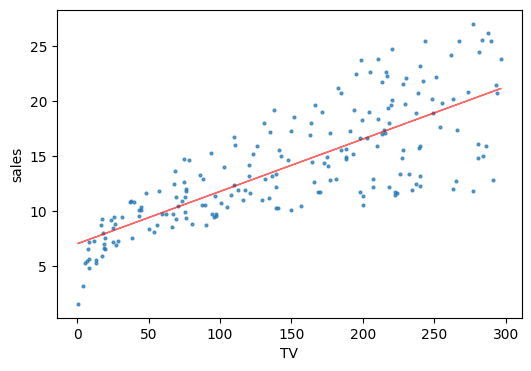

In [ ]:
tv = adv["TV"]
radio = adv["Radio"]
newspaper = adv["Newspaper"]

tv_k, tv_m, tv_r, tv_p, tv_e =st.linregress(tv, sales)
reg_line_tv = tv_k*tv + tv_m 

plt.figure(figsize=(6,4))
plt.scatter(tv, sales, s=4, alpha=.7)
plt.plot(tv, reg_line_tv, color="#ff0000", linewidth=1, alpha=.6)
plt.xlabel("TV")
plt.ylabel("sales")

print(f"Slope: {tv_k:.4f}, Intercept: {tv_m:.4f}, r_Value: {tv_r:.4f}, p_value: {tv_p:.4f}, error: {tv_e:.4f}")

Slope: 0.2025, Intercept: 9.3116, r_Value: 0.5762, p_value: 0.0000, error: 0.0204


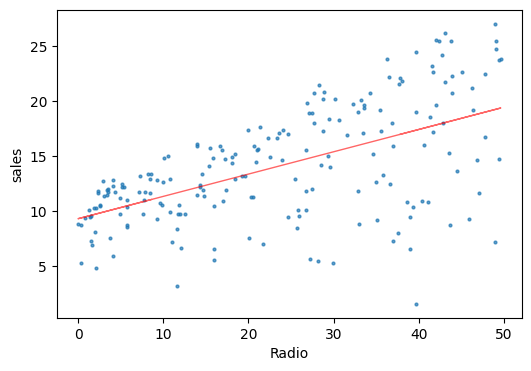

In [ ]:

radio_k, radio_m, radio_r, radio_p, radio_e =st.linregress(radio, sales)
reg_line_radio = radio_k*radio + radio_m 

plt.figure(figsize=(6,4))
plt.scatter(radio, sales, s=4, alpha=.7)
plt.plot(radio, reg_line_radio, color="#ff0000", linewidth=1, alpha=.6)
plt.xlabel("Radio")
plt.ylabel("sales")

print(f"Slope: {radio_k:.4f}, Intercept: {radio_m:.4f}, r_Value: {radio_r:.4f}, p_value: {radio_p:.4f}, error: {radio_e:.4f}")

Slope: 0.0547, Intercept: 12.3514, r_Value: 0.2283, p_value: 0.0011, error: 0.0166


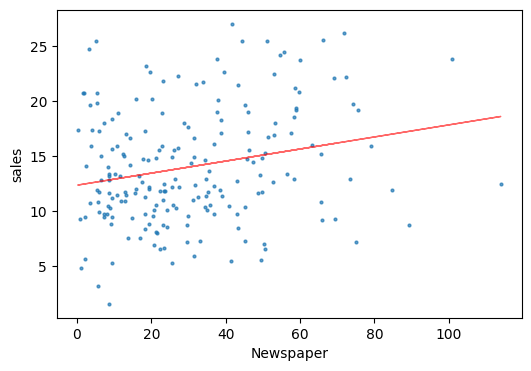

In [93]:

newspaper_k, newspaper_m, newspaper_r, newspaper_p, newspaper_e =st.linregress(newspaper, sales)
reg_line_newspaper = newspaper_k*newspaper + newspaper_m 

plt.figure(figsize=(6,4))
plt.scatter(newspaper, sales, s=4, alpha=.7)
plt.plot(newspaper, reg_line_newspaper, color="#ff0000", linewidth=1, alpha=.6)
plt.xlabel("Newspaper")
plt.ylabel("sales")

print(f"Slope: {newspaper_k:.4f}, Intercept: {newspaper_m:.4f}, r_Value: {newspaper_r:.4f}, p_value: {newspaper_p:.4f}, error: {newspaper_e:.4f}")

In [108]:
def mean(values):
    return round(sum(values)/len(values), 6)

def std(values):
    sqDiffsum = 0
    m = mean(values)
    n = len(values)
    for x in values:
        sqDiffsum += (x - m)**2
    
    std = np.sqrt(sqDiffsum/(n-1))

    return round(std, 6)


print(f"mean: {mean(sales)}")
print(f"Std: {std(sales)}")
display(adv.describe())

mean: 14.0225
Std: 5.217457


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


1.0